In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('milknew.csv')
df.head(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [6]:
df.isnull().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


In [7]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [10]:
def detect_outliers_iqr(df, features):
    outlier_indices = {}

    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices[col] = outliers.index.tolist()

    return outlier_indices

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'ID']

outliers = detect_outliers_iqr(df, numeric_cols)

print("Outlier Counts:")
for col, idx in outliers.items():
    print(f"{col}: {len(idx)} outliers")


Outlier Counts:
pH: 379 outliers
Temprature: 103 outliers
Taste: 0 outliers
Odor: 0 outliers
Fat : 0 outliers
Turbidity: 0 outliers
Colour: 32 outliers


In [14]:
for col in ['pH', 'Temprature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[col].median()

    df[col] = df[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)


col = 'Colour'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mode = df[col].mode()[0]

df[col] = df[col].apply(lambda x: mode if x < lower_bound or x > upper_bound else x)


df.to_csv('milk_cleaned.csv', index=False)

print("Outliers managed and cleaned dataset saved to 'milk_cleaned.csv'")

Outliers managed and cleaned dataset saved to 'milk_cleaned.csv'


In [15]:
def detect_outliers_iqr(df, features):
    outlier_indices = {}

    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices[col] = outliers.index.tolist()

    return outlier_indices

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'ID']

outliers = detect_outliers_iqr(df, numeric_cols)

print("Outlier Counts:")
for col, idx in outliers.items():
    print(f"{col}: {len(idx)} outliers")


Outlier Counts:
pH: 0 outliers
Temprature: 0 outliers
Taste: 0 outliers
Odor: 0 outliers
Fat : 0 outliers
Turbidity: 0 outliers
Colour: 0 outliers


In [18]:
from scipy import stats
Temprature_boxcox=stats.boxcox(df['Temprature'])[0]
pd.Series(Temprature_boxcox).skew()

np.float64(0.04679062109166757)

In [20]:
df['Grade'].replace({'high':2,'medium':1,'low':0},inplace=True)
df.head()

<ipython-input-20-d2e4d574fd09>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Grade'].replace({'high':2,'medium':1,'low':0},inplace=True)
<ipython-input-20-d2e4d574fd09>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Grade'].replace({'high':2,'medium':1,'low':0},inplace=True)


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35.0,1,0,1,0,254,2
1,6.6,36.0,0,1,0,1,253,2
2,6.7,41.0,1,1,1,1,246,0
3,6.7,34.0,1,1,0,1,255,0
4,6.6,37.0,0,0,0,0,255,1


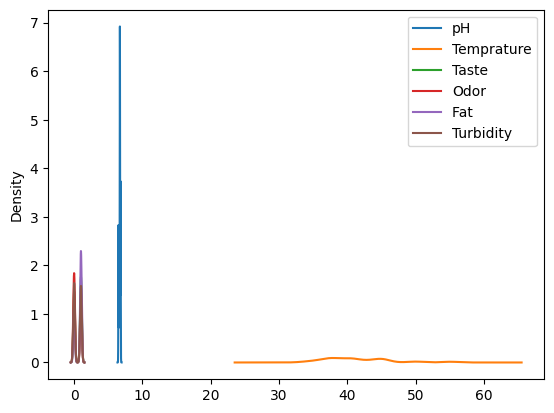

In [21]:
cols = df.columns[:6]
densityplot = df[cols].plot(kind='density')

In [23]:
df.Grade.value_counts()

,count
Grade,
0,429
1,374
2,256


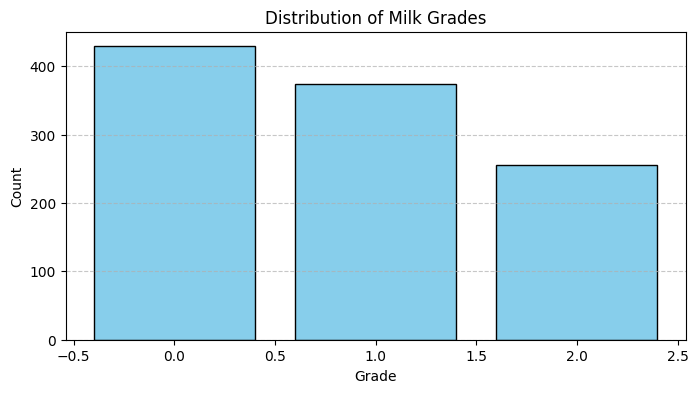

In [28]:
import matplotlib.pyplot as plt
grade_counts = df['Grade'].value_counts()
plt.figure(figsize=(8,4))
plt.bar(grade_counts.index, grade_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Milk Grades')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
df.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.316597,-0.002882,0.266473,0.181396,0.204119,-0.066715,-0.043875
Temprature,0.316597,1.000000,-0.170368,0.250833,0.120066,0.243595,-0.161570,-0.259564
Taste,-0.002882,-0.170368,1.000000,0.017582,0.324149,0.055755,-0.224990,0.025500
Odor,0.266473,0.250833,0.017582,1.000000,0.314505,0.457935,-0.028384,0.149626
Fat,0.181396,0.120066,0.324149,0.314505,1.000000,0.329264,-0.041223,0.151002
Turbidity,0.204119,0.243595,0.055755,0.457935,0.329264,1.000000,0.156960,-0.153634
Colour,-0.066715,-0.161570,-0.224990,-0.028384,-0.041223,0.156960,1.000000,-0.039881
Grade,-0.043875,-0.259564,0.025500,0.149626,0.151002,-0.153634,-0.039881,1.000000


<Axes: >

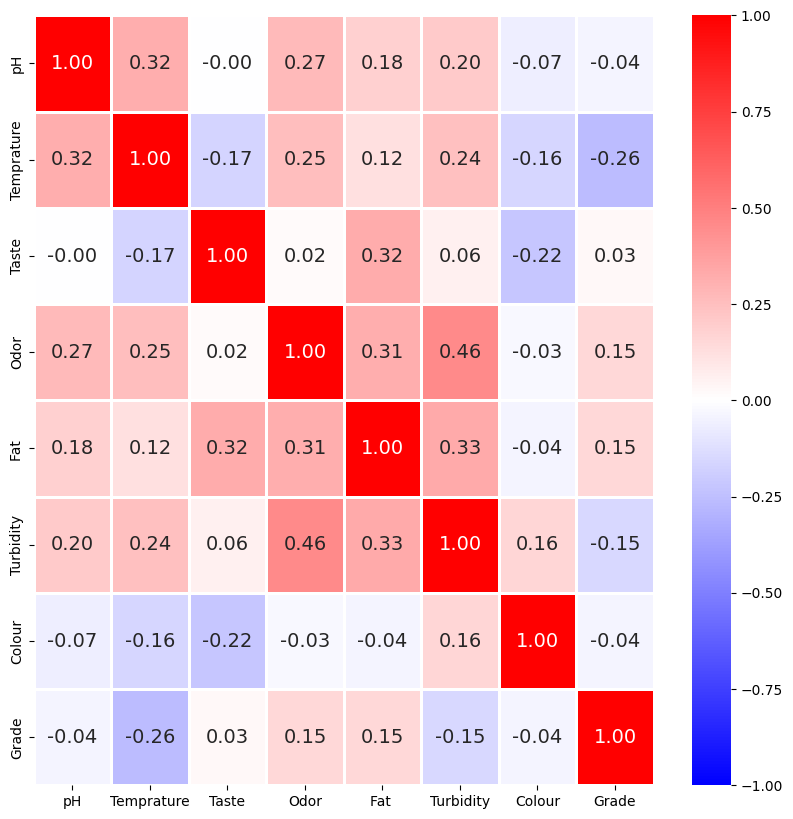

In [30]:
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(df.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "bwr")

In [31]:
x=df.drop(['Grade'],axis=1)
y=df['Grade']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [33]:
X_train

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
899,6.6,43.0,0,0,1,0,250
635,6.5,38.0,1,0,0,0,255
310,6.6,37.0,1,1,1,1,255
961,6.7,43.0,1,1,1,1,248
723,6.7,40.0,1,1,1,1,255
...,...,...,...,...,...,...,...
1033,6.6,38.0,0,0,0,0,255
763,6.7,50.0,0,1,1,1,255
835,6.7,38.0,1,0,1,0,255
559,6.7,43.0,1,0,1,1,250


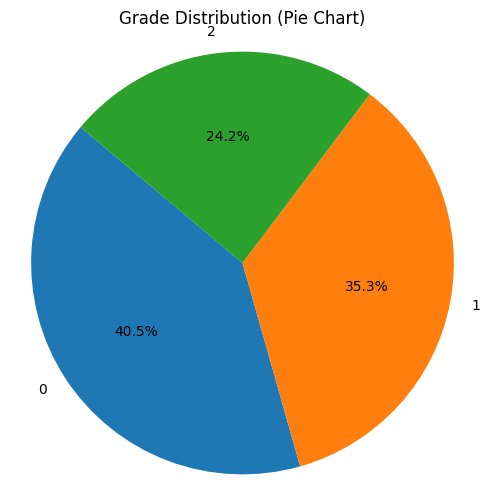

In [34]:
plt.figure(figsize=(6,6))
plt.pie(grade_counts.values, labels=grade_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Grade Distribution (Pie Chart)')
plt.axis('equal')
plt.show()


In [35]:
summary = df['Grade'].value_counts().reset_index()
summary.columns = ['Grade', 'Count']
print(summary)

   Grade  Count
0      0    429
1      1    374
2      2    256


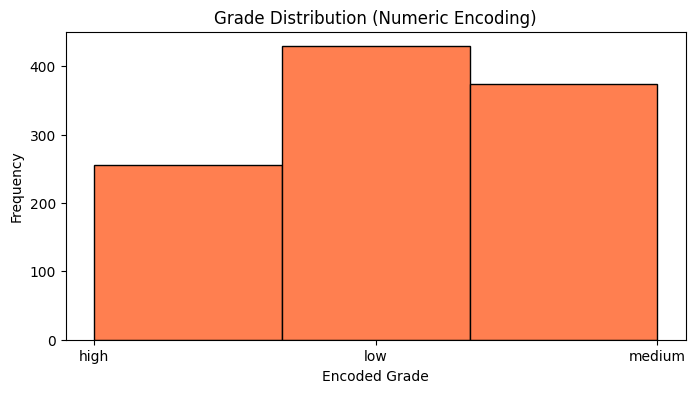

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Grade_num'] = le.fit_transform(df['Grade'])

plt.figure(figsize=(8,4))
plt.hist(df['Grade_num'], bins=3, edgecolor='black', color='coral')
plt.title('Grade Distribution (Numeric Encoding)')
plt.xlabel('Encoded Grade')
plt.ylabel('Frequency')
plt.xticks(ticks=[0,1,2], labels=le.classes_)
plt.show()


In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.9716981132075472

Classification Report:
               precision    recall  f1-score   support

        high       0.92      0.96      0.94        48
         low       0.99      0.95      0.97        78
      medium       0.99      1.00      0.99        86

    accuracy                           0.97       212
   macro avg       0.97      0.97      0.97       212
weighted avg       0.97      0.97      0.97       212



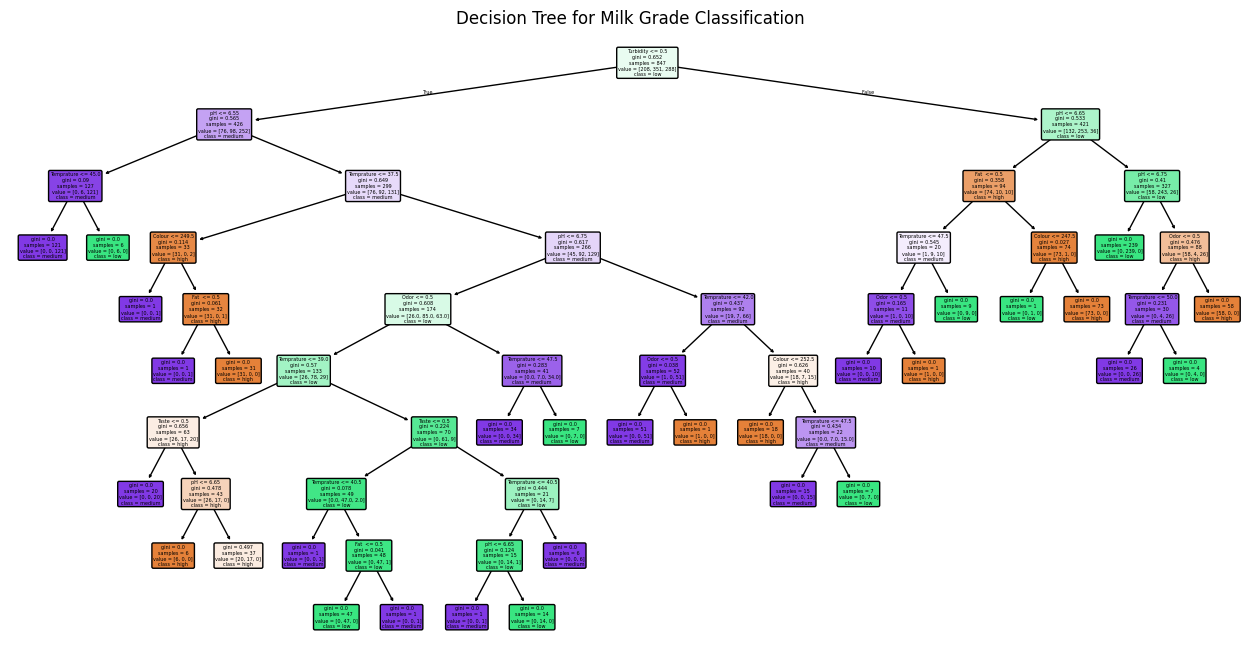

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
df = pd.read_csv('milk_cleaned.csv')
X = df.drop('Grade', axis=1)
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(16, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True, rounded=True)
plt.title("Decision Tree for Milk Grade Classification")
plt.show()


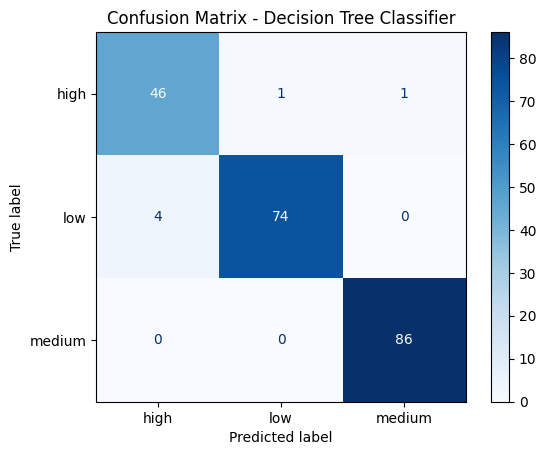

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
df = pd.read_csv('milk_cleaned.csv')
X = df.drop('Grade', axis=1)
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('milk_cleaned.csv')
X = df.drop('Grade', axis=1)
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result_df = pd.DataFrame(X_test.copy())
result_df['Actual Grade'] = y_test.values
result_df['Predicted Grade'] = y_pred
print(result_df.head(10))
result_df.to_csv('milk_test_results.csv', index=False)


      pH  Temprature  Taste  Odor  Fat   Turbidity  Colour Actual Grade  \
576  6.6        40.0      1     0     1          1     255         high   
312  6.7        41.0      0     1     1          1     250          low   
70   6.7        43.0      1     0     1          1     250          low   
682  6.8        45.0      0     0     0          1     255       medium   
896  6.6        38.0      0     0     0          0     255       medium   
912  6.7        41.0      1     0     1          1     255          low   
308  6.7        34.0      1     1     0          1     255          low   
660  6.8        45.0      0     1     1          1     255         high   
174  6.7        43.0      1     1     1          1     248          low   
192  6.5        38.0      1     0     1          0     255       medium   

    Predicted Grade  
576            high  
312             low  
70              low  
682          medium  
896          medium  
912             low  
308             low 